In [ ]:
''' Assuptions
1. Data is free of missing values
2. The predictant variable is binary(only accepts two values) or ordinal(a categorical variable 
with ordered variable
3. All predictors are indepedent of each other
4. There are atleast 50 observations per predictor variable (to ensure reliable status)'''

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [3]:
addr = "C:/Users/Sujay/Workspace/CH05_Basic_Algorithm_Learning/mtcars.csv"
cars = pd.read_csv(addr)
cars.columns = ['cars_name','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
print(cars.head())

           cars_name   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


In [10]:
cars_data = cars.loc[:,['drat','carb']].values
cars_data_names = ['drat','carb']

y = cars.iloc[:,9].values

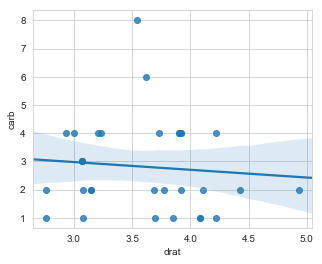

In [11]:
sb.regplot(x='drat',y='carb',data=cars,scatter=True)

In [12]:
drat = cars['drat']
carb = cars['carb']

spearmanr_coeff,p_value = spearmanr(drat,carb)
print('spearman rank correlation coefficient %0.3f' %(spearmanr_coeff))

spearman rank correlation coefficient -0.125


In [13]:
cars.isnull().sum()

cars_name    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

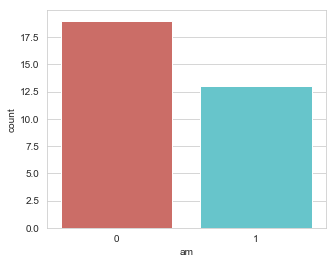

In [15]:
sb.countplot(x='am',data=cars,palette='hls')

In [17]:
cars.info()

# In the below output the data set is very small with 32 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
cars_name    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.9+ KB


In [18]:
X = scale(cars_data)

In [19]:
LogReg = LogisticRegression()

LogReg.fit(X,y)
print(LogReg.score(X,y))

0.8125


c:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

   micro avg       0.81      0.81      0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32

